In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [138]:
ds=pd.read_csv('./Monthly_data_cmo.csv')
df=pd.read_csv('./CMO_MSP_Mandi.csv')

In [139]:
print(ds.head())
ds.shape

         APMC      Commodity  Year  Month  arrivals_in_qtl  min_price  \
0  Ahmednagar          Bajri  2015  April               79       1406   
1  Ahmednagar          Bajri  2016  April              106       1788   
2  Ahmednagar  Wheat(Husked)  2015  April             1253       1572   
3  Ahmednagar  Wheat(Husked)  2016  April              387       1750   
4  Ahmednagar  Sorgum(Jawar)  2015  April             3825       1600   

   max_price  modal_price     date district_name   state_name  
0       1538         1463  2015-04    Ahmadnagar  Maharashtra  
1       1925         1875  2016-04    Ahmadnagar  Maharashtra  
2       1890         1731  2015-04    Ahmadnagar  Maharashtra  
3       2220         1999  2016-04    Ahmadnagar  Maharashtra  
4       2200         1900  2015-04    Ahmadnagar  Maharashtra  


(62429, 11)

In [140]:
print(df.head())
df.shape

         commodity  year          Type  msprice  msp_filter
0   PADDY-UNHUSKED  2012  Kharif Crops   1250.0           1
1  RICE(PADDY-HUS)  2012  Kharif Crops   1280.0           1
2     Jowar_Hybrid  2012  Kharif Crops   1500.0           1
3    SORGUM(JAWAR)  2012  Kharif Crops   1520.0           1
4            BAJRI  2012  Kharif Crops   1175.0           1


(155, 5)

# Analysing Data through Plots

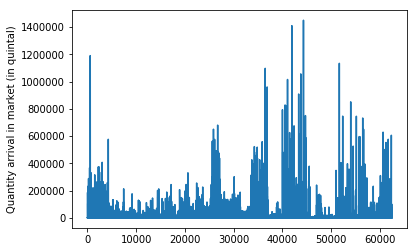

In [141]:
plt.plot(ds.arrivals_in_qtl)
plt.ylabel("Quantity arrival in market (in quintal)")
plt.show()

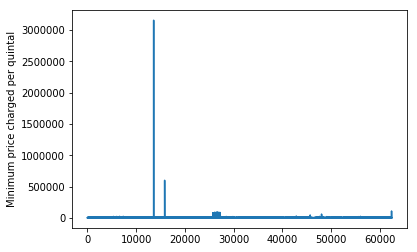

In [142]:
plt.plot(ds.min_price)
plt.ylabel("Minimum price charged per quintal")
plt.show()

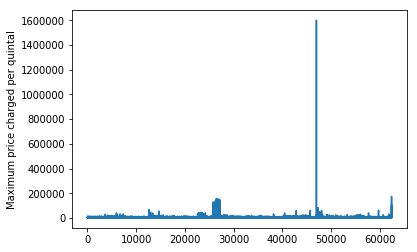

In [143]:
plt.plot(ds.max_price)
plt.ylabel("Maximum price charged per quintal")
plt.show()

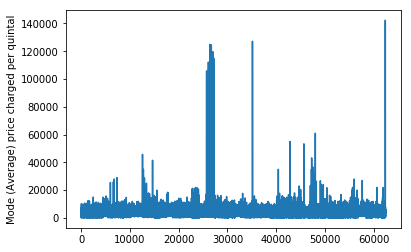

In [144]:
plt.plot(ds.modal_price)
plt.ylabel("Mode (Average) price charged per quintal")
plt.show()

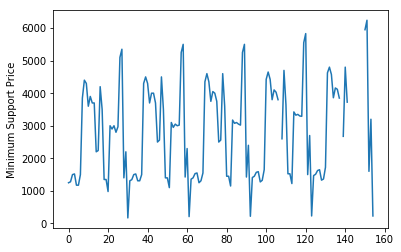

In [145]:
plt.plot(df.msprice)
plt.ylabel("Minimum Support Price")
plt.show()

# Data Cleaning


In [146]:
df.describe()

,year,msprice,msp_filter
count,155.000000,145.000000,155.0
mean,2014.000000,2822.448276,1.0
std,1.418798,1441.725928,0.0
min,2012.000000,170.000000,1.0
25%,2013.000000,1470.000000,1.0
50%,2014.000000,2970.000000,1.0
75%,2015.000000,4000.000000,1.0
max,2016.000000,6240.000000,1.0


In [147]:
df.isnull().sum()

commodity      0
year           0
Type           0
msprice       10
msp_filter     0
dtype: int64

In [148]:
df[df.msprice.isnull()]

,commodity,year,Type,msprice,msp_filter
107,Soyabean_Black,2015,Kharif Crops,NaN,1
138,Soyabean_Black,2016,Kharif Crops,NaN,1
142,WHEAT(HUSKED),2016,Rabi Crops,NaN,1
143,WHEAT(UNHUSKED),2016,Rabi Crops,NaN,1
144,BARLI,2016,Rabi Crops,NaN,1
145,Gram_Yellow,2016,Rabi Crops,NaN,1
146,Masur_Yellow,2016,Rabi Crops,NaN,1
147,MUSTARD,2016,Rabi Crops,NaN,1
148,SAFFLOWER,2016,Rabi Crops,NaN,1
149,Toria_Yellow,2016,Rabi Crops,NaN,1


The rows with NaN values are repopulated as the dataset is small, The missing values are of year 2016.


In [149]:
filt=df.sort_values(by=["commodity","year"])

In [150]:
df['commodity']=[i.lower() for i in filt.commodity.values]
df.head()

,commodity,year,Type,msprice,msp_filter
0,bajri,2012,Kharif Crops,1250.0,1
1,bajri,2012,Kharif Crops,1280.0,1
2,bajri,2012,Kharif Crops,1500.0,1
3,bajri,2012,Kharif Crops,1520.0,1
4,bajri,2012,Kharif Crops,1175.0,1


In [151]:
filt=filt.fillna(method='ffill',limit=1)

In [152]:
filt[filt.msprice.isnull()]

,commodity,year,Type,msprice,msp_filter
138,Soyabean_Black,2016,Kharif Crops,NaN,1


In [153]:
filt=filt.fillna(method='ffill',limit=1)

In [154]:
filt[filt.msprice.isnull()]

,commodity,year,Type,msprice,msp_filter


In [155]:
print("Final shape of Mandi Data: ", filt.shape)
filt.to_csv("cleaned_Mandi_data_cmo.csv")


Final shape of Mandi Data:  (155, 5)


# Data visulisation finding outliers

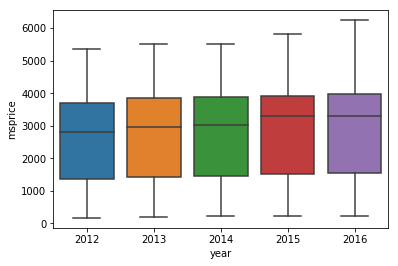

In [162]:
plot1 = sb.boxplot(x="year", y="msprice", data=filt, whis=1.5)


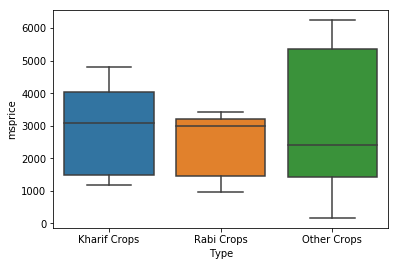

In [163]:
plot2 = sb.boxplot(x="Type", y="msprice", data=filt, whis=1.5)


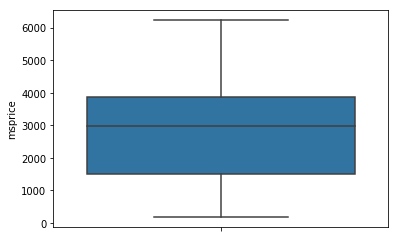

In [164]:
plot3 = sb.boxplot(y="msprice", data=filt, whis=1.5)


In [165]:
filt.head()

,commodity,year,Type,msprice,msp_filter
4,BAJRI,2012,Kharif Crops,1175.0,1
35,BAJRI,2013,Kharif Crops,1310.0,1
66,BAJRI,2014,Kharif Crops,1250.0,1
97,BAJRI,2015,Kharif Crops,1275.0,1
128,BAJRI,2016,Kharif Crops,1330.0,1


In [166]:
filt.index=filt['year']
filt

,commodity,year,Type,msprice,msp_filter
year,,,,,
2012,BAJRI,2012,Kharif Crops,1175.0,1
2013,BAJRI,2013,Kharif Crops,1310.0,1
2014,BAJRI,2014,Kharif Crops,1250.0,1
2015,BAJRI,2015,Kharif Crops,1275.0,1
2016,BAJRI,2016,Kharif Crops,1330.0,1
2012,BARLI,2012,Rabi Crops,980.0,1
2013,BARLI,2013,Rabi Crops,1100.0,1
2014,BARLI,2014,Rabi Crops,1150.0,1
2015,BARLI,2015,Rabi Crops,1225.0,1
